# Базовые алгоритмы машинного обучения. Задача классификации.
# Метод: Дерево решений 

## Задание

1. Разработать программу реализующую алгоритм дерево решений для анализа выбранного набора данных.
2. Визуализировать используемый набор данных и работу алгоритма.
3. Построить график зависимости качества классификации от глубины дерева.
4. Провести анализ зависимости качества классификации от используемого критерия разделения (Джини, энтропия, ошибка классификации).
5. Подобрать параметры алгоритма так, чтобы получить наилучшее качество модели на тестовых данных.

## Подключение необходимых библиотек

`%matplotlib inline` -> визуализирует графики с matplotlib прямо в jupyter notebook, а не в отдельном окне

In [715]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score

from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs

## Набор данных 1

In [716]:
X, y = make_moons(n_samples=2000, noise=0.3, random_state=0)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [717]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#### Изобразим данные на графике.

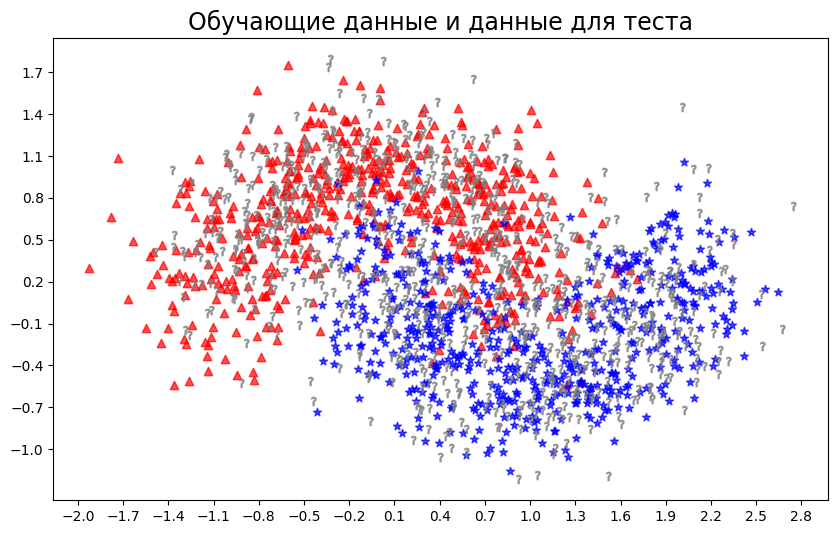

In [718]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.7)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.7)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="grey", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="grey", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-2, 3, 0.3))
ax.set_yticks(np.arange(-1, 2, 0.3))

plt.show()

### Реализуем метод Дерево решений для набора данных №1

#### Реализуем метод без гиперпараметров

In [719]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
y_pred = model_tree.predict(x_test)

print("Глубина дерева решений =", model_tree.get_depth())
print("Кол-во листьев дерева решений =", model_tree.get_n_leaves(), "\n")

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model_tree.score) =", model_tree.score(x_test, y_test))

Глубина дерева решений = 14
Кол-во листьев дерева решений = 110 

Точность работы модели (accuracy_score) = 0.87875
Точность работы модели (model_tree.score) = 0.87875


Теперь постараемся улучшить качество работы модели с помощью кросс-валидации и гиперпараметров. В качестве гиперпараметров будут выступать `criterion` и `max_depth`.

> **criterion**: {“gini”, “entropy”, “log_loss”}, default=”gini”<br>
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.<br>
<u>(Метод поиска оптимального признака для ветвления)</u>

> **max_depth**: int, default=None<br>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

#### Поиск наилучших гиперпараметров для метода

In [720]:
value_accuracy_score_array = [[],[],[]] 
#value_accuracy_score_array[0] - criterion="gini"
#value_accuracy_score_array[1] - criterion="entropy"
#value_accuracy_score_array[2] - criterion="log_loss"

#value_accuracy_score_array[0][0] - criterion="gini", max_depth = 1
#value_accuracy_score_array[0][1] - criterion="gini", max_depth = 2
#...
#value_accuracy_score_array[1][0] - criterion="entropy", max_depth = 1
#value_accuracy_score_array[1][1] - criterion="entropy", max_depth = 2
#...
#value_accuracy_score_array[2][0] - criterion="log_loss", max_depth = 1
#value_accuracy_score_array[2][1] - criterion="log_loss", max_depth = 2
#...

criterion_function = ["gini", "entropy", "log_loss"]
count_max_depth = list(range(1,21))

#Индексы используются для записи в value_accuracy_score_array
index_criterion_function = 0
index_count_max_depth = 0

for crit_func in criterion_function:
    index_count_max_depth = 0
    for count_tree_depth in count_max_depth:
        model_tree = DecisionTreeClassifier(criterion=crit_func, max_depth=count_tree_depth)
        cv_result=cross_validate(model_tree, x_train, y_train, cv=3)#Кросс_валидация
        sum_score_cross_validate = 0
        for i in range(3):
            sum_score_cross_validate+=cv_result['test_score'][i]
        value_accuracy_score_array[index_criterion_function].append(sum_score_cross_validate/3)#avg score cross_validate
        index_count_max_depth+=1
    index_criterion_function+=1
        
print("gini - avg score cross_validate for different max_depth", value_accuracy_score_array[0],"\n")
print("entropy - avg score cross_validate for different max_depth", value_accuracy_score_array[1],"\n")
print("log_loss - avg score cross_validate for different max_depth", value_accuracy_score_array[2])

gini - avg score cross_validate for different max_depth [0.7941666666666668, 0.8883333333333333, 0.8883333333333333, 0.8850000000000001, 0.8958333333333334, 0.9041666666666667, 0.9050000000000001, 0.9008333333333333, 0.8975, 0.8966666666666666, 0.8925000000000001, 0.8916666666666666, 0.8883333333333333, 0.89, 0.8916666666666666, 0.8908333333333335, 0.8908333333333335, 0.8925, 0.895, 0.8908333333333333] 

entropy - avg score cross_validate for different max_depth [0.7925, 0.89, 0.89, 0.8866666666666667, 0.8825, 0.8991666666666666, 0.9008333333333334, 0.9025, 0.8958333333333334, 0.9008333333333334, 0.895, 0.8991666666666666, 0.8966666666666666, 0.8883333333333333, 0.8916666666666666, 0.8941666666666667, 0.8916666666666666, 0.8891666666666667, 0.8941666666666667, 0.89] 

log_loss - avg score cross_validate for different max_depth [0.7925, 0.89, 0.89, 0.8866666666666667, 0.8825, 0.8991666666666666, 0.9008333333333334, 0.9033333333333333, 0.8958333333333334, 0.8991666666666666, 0.8966666666

Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметров `criterion` и `max_depth` модель дает лучший результат.

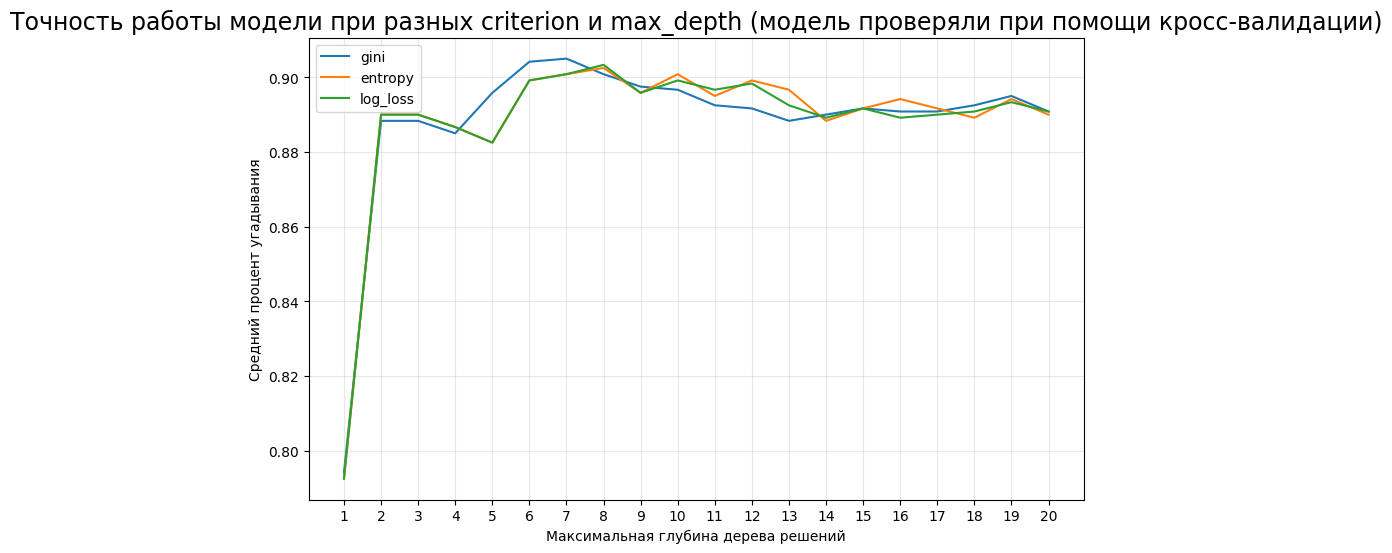

In [721]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(count_max_depth, value_accuracy_score_array[0], label=criterion_function[0])
ax.plot(count_max_depth, value_accuracy_score_array[1], label=criterion_function[1])
ax.plot(count_max_depth, value_accuracy_score_array[2], label=criterion_function[2])

ax.set_title("Точность работы модели при разных criterion и max_depth \
(модель проверяли при помощи кросс-валидации)", fontsize=17)

ax.set_xlabel("Максимальная глубина дерева решений") # Подписываем ось X
ax.set_ylabel("Средний процент угадывания") # Подписываем ось Y

ax.set_xticks(count_max_depth)

ax.legend(loc='best') # Расположение легенды (выбирается лучшее расположение автоматически)

ax.grid(alpha = 0.3)

plt.show()

**Из полученного графика видно, что наилучшее решение получится при <u>criterion="gini"</u> и <u>max_depth=7</u>. Протестировав модель с помощью кросс-валидации, мы понижаем шанс переобучения модели.**

#### Реализуем метод с наилучшими гиперпараметрами

In [722]:
model_tree = DecisionTreeClassifier(criterion="gini", max_depth=7)
model_tree.fit(x_train, y_train)
y_pred = model_tree.predict(x_test)

print("Глубина дерева решений =", model_tree.get_depth())
print("Кол-во листьев дерева решений =", model_tree.get_n_leaves(), "\n")

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model_tree.score) =", model_tree.score(x_test, y_test))

Глубина дерева решений = 7
Кол-во листьев дерева решений = 40 

Точность работы модели (accuracy_score) = 0.905
Точность работы модели (model_tree.score) = 0.905


#### Изобразим результат работы алгоритма на графике

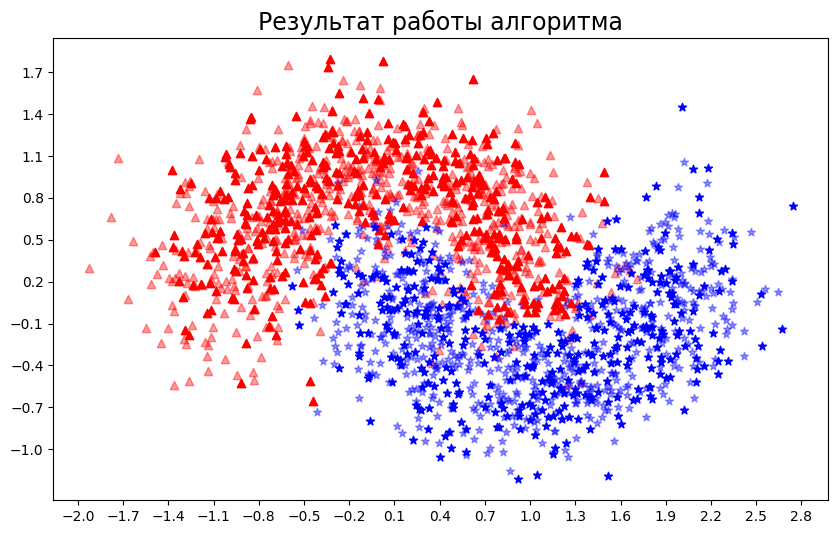

In [723]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-2, 3, 0.3))
ax.set_yticks(np.arange(-1, 2, 0.3))

plt.show()

## Набор данных 2

In [748]:
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, class_sep=0.4,
                           random_state=1, n_clusters_per_class=1)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [749]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#### Изобразим данные на графике.

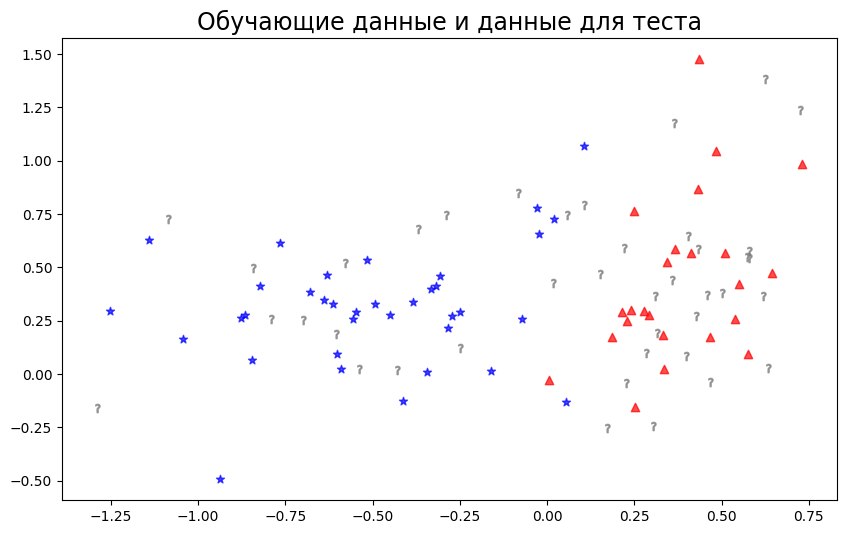

In [750]:
fig, ax = plt.subplots(figsize = (10,6))

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.7)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.7)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="grey", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="grey", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-1.25, 1, 0.25))
ax.set_yticks(np.arange(-0.5, 1.75, 0.25))

plt.show()

### Реализуем метод Дерево решений для набора данных №2

#### Реализуем метод без гиперпараметров

In [751]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
y_pred = model_tree.predict(x_test)

print("Глубина дерева решений =", model_tree.get_depth())
print("Кол-во листьев дерева решений =", model_tree.get_n_leaves(), "\n")

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model_tree.score) =", model_tree.score(x_test, y_test))

Глубина дерева решений = 3
Кол-во листьев дерева решений = 4 

Точность работы модели (accuracy_score) = 0.95
Точность работы модели (model_tree.score) = 0.95


Теперь постараемся улучшить качество работы модели с помощью кросс-валидации и гиперпараметров. В качестве гиперпараметров будут выступать `criterion` и `max_depth`.

> **criterion**: {“gini”, “entropy”, “log_loss”}, default=”gini”<br>
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.<br>
<u>(Метод поиска оптимального признака для ветвления)</u>

> **max_depth**: int, default=None<br>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

#### Поиск наилучших гиперпараметров для метода

In [756]:
value_accuracy_score_array = [[],[],[]] 
#value_accuracy_score_array[0] - criterion="gini"
#value_accuracy_score_array[1] - criterion="entropy"
#value_accuracy_score_array[2] - criterion="log_loss"

#value_accuracy_score_array[0][0] - criterion="gini", max_depth = 1
#value_accuracy_score_array[0][1] - criterion="gini", max_depth = 2
#...
#value_accuracy_score_array[1][0] - criterion="entropy", max_depth = 1
#value_accuracy_score_array[1][1] - criterion="entropy", max_depth = 2
#...
#value_accuracy_score_array[2][0] - criterion="log_loss", max_depth = 1
#value_accuracy_score_array[2][1] - criterion="log_loss", max_depth = 2
#...

criterion_function = ["gini", "entropy", "log_loss"]
count_max_depth = list(range(1,11))

#Индексы используются для записи в value_accuracy_score_array
index_criterion_function = 0
index_count_max_depth = 0

for crit_func in criterion_function:
    index_count_max_depth = 0
    for count_tree_depth in count_max_depth:
        model_tree = DecisionTreeClassifier(criterion=crit_func, max_depth=count_tree_depth)
        cv_result=cross_validate(model_tree, x_train, y_train, cv=3)#Кросс_валидация
        sum_score_cross_validate = 0
        for i in range(3):
            sum_score_cross_validate+=cv_result['test_score'][i]
        value_accuracy_score_array[index_criterion_function].append(sum_score_cross_validate/3)#avg score cross_validate
        index_count_max_depth+=1
    index_criterion_function+=1
        
print("gini - avg score cross_validate for different max_depth", value_accuracy_score_array[0],"\n")
print("entropy - avg score cross_validate for different max_depth", value_accuracy_score_array[1],"\n")
print("log_loss - avg score cross_validate for different max_depth", value_accuracy_score_array[2])

gini - avg score cross_validate for different max_depth [0.9833333333333334, 0.9833333333333334, 0.9833333333333334, 0.9833333333333334, 0.9666666666666667, 0.9666666666666667, 0.9833333333333334, 0.9833333333333334, 0.9666666666666667, 0.9833333333333334] 

entropy - avg score cross_validate for different max_depth [0.9833333333333334, 0.9833333333333334, 0.9833333333333334, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9833333333333334, 0.9666666666666667, 0.9666666666666667, 0.9833333333333334] 

log_loss - avg score cross_validate for different max_depth [0.9833333333333334, 0.9833333333333334, 0.9833333333333334, 0.9833333333333334, 0.9666666666666667, 0.9666666666666667, 0.9833333333333334, 0.9833333333333334, 0.9833333333333334, 0.9833333333333334]


Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметров `criterion` и `max_depth` модель дает лучший результат.

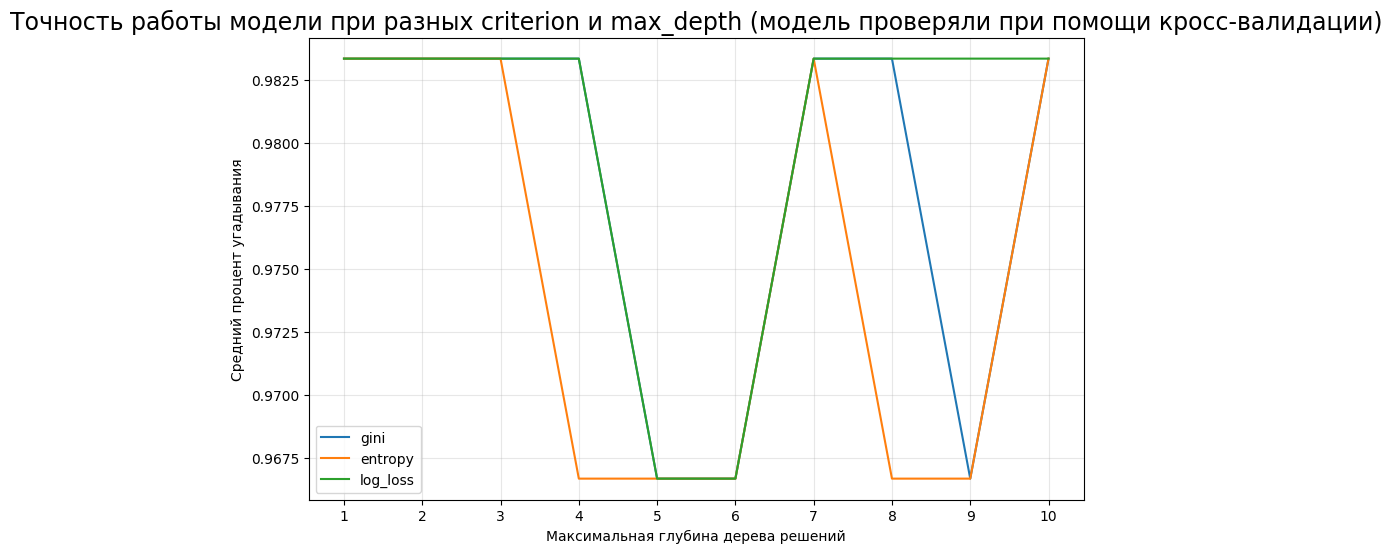

In [757]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(count_max_depth, value_accuracy_score_array[0], label=criterion_function[0])
ax.plot(count_max_depth, value_accuracy_score_array[1], label=criterion_function[1])
ax.plot(count_max_depth, value_accuracy_score_array[2], label=criterion_function[2])

ax.set_title("Точность работы модели при разных criterion и max_depth \
(модель проверяли при помощи кросс-валидации)", fontsize=17)

ax.set_xlabel("Максимальная глубина дерева решений") # Подписываем ось X
ax.set_ylabel("Средний процент угадывания") # Подписываем ось Y

ax.set_xticks(count_max_depth)

ax.legend(loc='best') # Расположение легенды (выбирается лучшее расположение автоматически)

ax.grid(alpha = 0.3)

plt.show()

**На самом деле для такого не глубокого дерева, сложно сделать какой-то вывод по гиперпараметрам, так как они дают +- одинаковый результат, отличающийся только в пределах небольшой погрешности.**<br>
criterion="gini", criterion="entropy", criterion="log_loss" -> выдадут одинаковый результат.<br>
max_depth нет смысла выставлять больше 3, потому что не получится собрать дерево глубже этого значения.

#### Реализуем метод с наилучшими гиперпараметрами

In [761]:
model_tree = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model_tree.fit(x_train, y_train)
y_pred = model_tree.predict(x_test)

print("Глубина дерева решений =", model_tree.get_depth())
print("Кол-во листьев дерева решений =", model_tree.get_n_leaves(), "\n")

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model_tree.score) =", model_tree.score(x_test, y_test))

Глубина дерева решений = 3
Кол-во листьев дерева решений = 4 

Точность работы модели (accuracy_score) = 0.95
Точность работы модели (model_tree.score) = 0.95


#### Изобразим результат работы алгоритма на графике

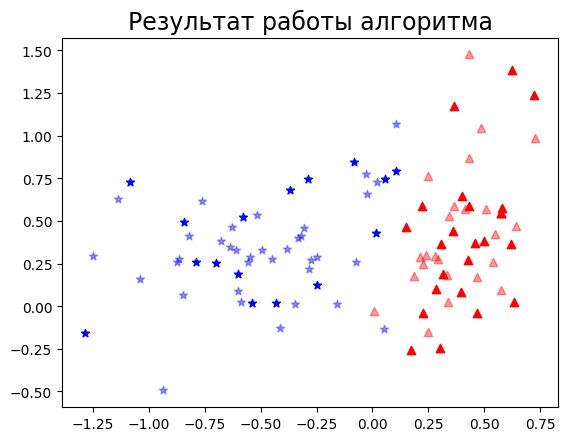

In [762]:
fig, ax = plt.subplots()

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-1.25, 1, 0.25))
ax.set_yticks(np.arange(-0.5, 1.75, 0.25))

plt.show()

## Набор данных 3

In [763]:
X, y = make_circles(n_samples=100, noise=0.2, factor=0.3, random_state=1)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [764]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#### Изобразим данные на графике.

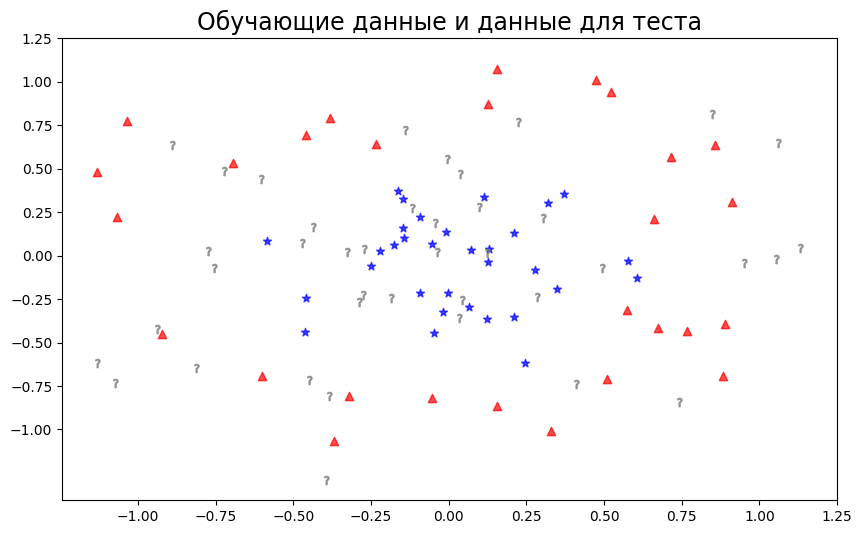

In [765]:
fig, ax = plt.subplots(figsize = (10,6))

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.7)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.7)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="grey", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="grey", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-1, 1.5, 0.25))
ax.set_yticks(np.arange(-1, 1.5, 0.25))

plt.show()

### Реализуем метод Дерево решений для набора данных №3

#### Реализуем метод без гиперпараметров

In [766]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
y_pred = model_tree.predict(x_test)

print("Глубина дерева решений =", model_tree.get_depth())
print("Кол-во листьев дерева решений =", model_tree.get_n_leaves(), "\n")

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model_tree.score) =", model_tree.score(x_test, y_test))

Глубина дерева решений = 6
Кол-во листьев дерева решений = 10 

Точность работы модели (accuracy_score) = 0.9
Точность работы модели (model_tree.score) = 0.9


Теперь постараемся улучшить качество работы модели с помощью кросс-валидации и гиперпараметров. В качестве гиперпараметров будут выступать `criterion` и `max_depth`.

> **criterion**: {“gini”, “entropy”, “log_loss”}, default=”gini”<br>
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.<br>
<u>(Метод поиска оптимального признака для ветвления)</u>

> **max_depth**: int, default=None<br>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

#### Поиск наилучших гиперпараметров для метода

In [769]:
value_accuracy_score_array = [[],[],[]] 
#value_accuracy_score_array[0] - criterion="gini"
#value_accuracy_score_array[1] - criterion="entropy"
#value_accuracy_score_array[2] - criterion="log_loss"

#value_accuracy_score_array[0][0] - criterion="gini", max_depth = 1
#value_accuracy_score_array[0][1] - criterion="gini", max_depth = 2
#...
#value_accuracy_score_array[1][0] - criterion="entropy", max_depth = 1
#value_accuracy_score_array[1][1] - criterion="entropy", max_depth = 2
#...
#value_accuracy_score_array[2][0] - criterion="log_loss", max_depth = 1
#value_accuracy_score_array[2][1] - criterion="log_loss", max_depth = 2
#...

criterion_function = ["gini", "entropy", "log_loss"]
count_max_depth = list(range(1,11))

#Индексы используются для записи в value_accuracy_score_array
index_criterion_function = 0
index_count_max_depth = 0

for crit_func in criterion_function:
    index_count_max_depth = 0
    for count_tree_depth in count_max_depth:
        model_tree = DecisionTreeClassifier(criterion=crit_func, max_depth=count_tree_depth)
        cv_result=cross_validate(model_tree, x_train, y_train, cv=3)#Кросс_валидация
        sum_score_cross_validate = 0
        for i in range(3):
            sum_score_cross_validate+=cv_result['test_score'][i]
        value_accuracy_score_array[index_criterion_function].append(sum_score_cross_validate/3)#avg score cross_validate
        index_count_max_depth+=1
    index_criterion_function+=1
        
print("gini - avg score cross_validate for different max_depth", value_accuracy_score_array[0],"\n")
print("entropy - avg score cross_validate for different max_depth", value_accuracy_score_array[1],"\n")
print("log_loss - avg score cross_validate for different max_depth", value_accuracy_score_array[2])

gini - avg score cross_validate for different max_depth [0.5833333333333334, 0.7833333333333333, 0.8833333333333333, 0.8333333333333334, 0.8333333333333334, 0.8666666666666666, 0.9166666666666666, 0.8333333333333334, 0.8666666666666666, 0.9333333333333332] 

entropy - avg score cross_validate for different max_depth [0.5833333333333334, 0.8166666666666668, 0.8666666666666667, 0.8333333333333334, 0.9166666666666666, 0.9166666666666666, 0.9333333333333332, 0.8666666666666666, 0.8333333333333334, 0.9166666666666666] 

log_loss - avg score cross_validate for different max_depth [0.5833333333333334, 0.8166666666666668, 0.8833333333333333, 0.8333333333333334, 0.9333333333333332, 0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.9333333333333332, 0.85]


Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметров `criterion` и `max_depth` модель дает лучший результат.

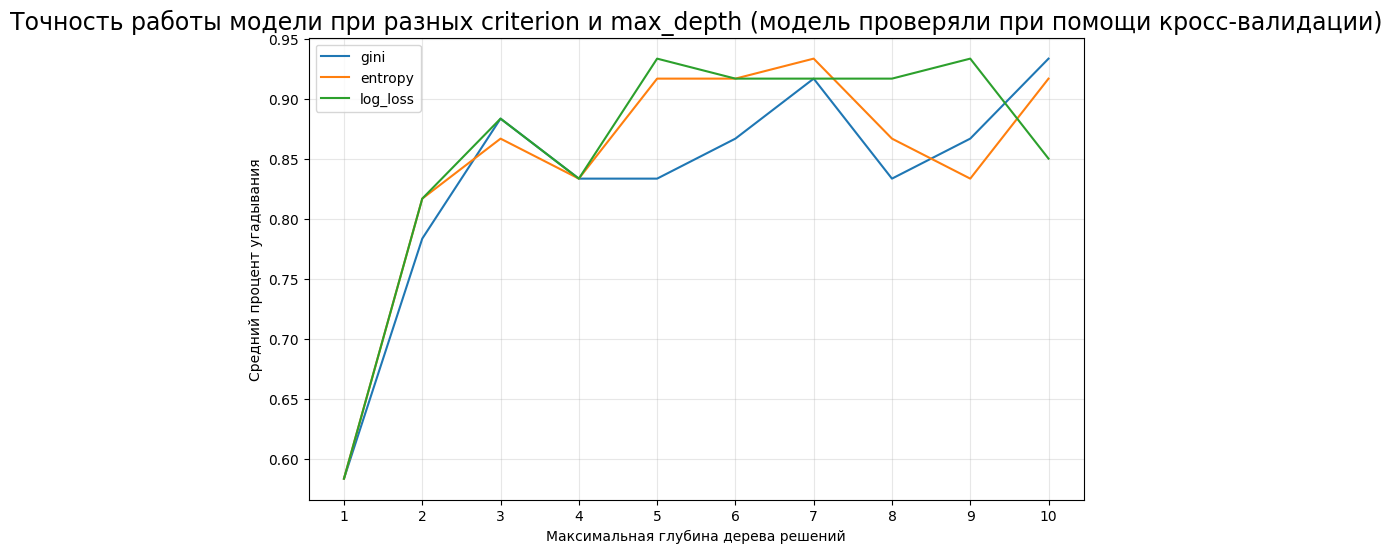

In [770]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(count_max_depth, value_accuracy_score_array[0], label=criterion_function[0])
ax.plot(count_max_depth, value_accuracy_score_array[1], label=criterion_function[1])
ax.plot(count_max_depth, value_accuracy_score_array[2], label=criterion_function[2])

ax.set_title("Точность работы модели при разных criterion и max_depth \
(модель проверяли при помощи кросс-валидации)", fontsize=17)

ax.set_xlabel("Максимальная глубина дерева решений") # Подписываем ось X
ax.set_ylabel("Средний процент угадывания") # Подписываем ось Y

ax.set_xticks(count_max_depth)

ax.legend(loc='best') # Расположение легенды (выбирается лучшее расположение автоматически)

ax.grid(alpha = 0.3)

plt.show()

**На самом деле для такого не глубокого дерева, сложно сделать какой-то вывод по гиперпараметрам, так как они дают +- одинаковый результат, отличающийся только в пределах небольшой погрешности.**<br>
criterion="gini", criterion="entropy", criterion="log_loss" -> выдадут одинаковый результат.<br>
max_depth нет смысла выставлять больше 6, потому что не получится собрать дерево глубже этого значения.

#### Реализуем метод с наилучшими гиперпараметрами

In [780]:
model_tree = DecisionTreeClassifier(criterion="log_loss", max_depth=5)
model_tree.fit(x_train, y_train)
y_pred = model_tree.predict(x_test)

print("Глубина дерева решений =", model_tree.get_depth())
print("Кол-во листьев дерева решений =", model_tree.get_n_leaves(), "\n")

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model_tree.score) =", model_tree.score(x_test, y_test))

Глубина дерева решений = 5
Кол-во листьев дерева решений = 9 

Точность работы модели (accuracy_score) = 0.925
Точность работы модели (model_tree.score) = 0.925


#### Изобразим результат работы алгоритма на графике

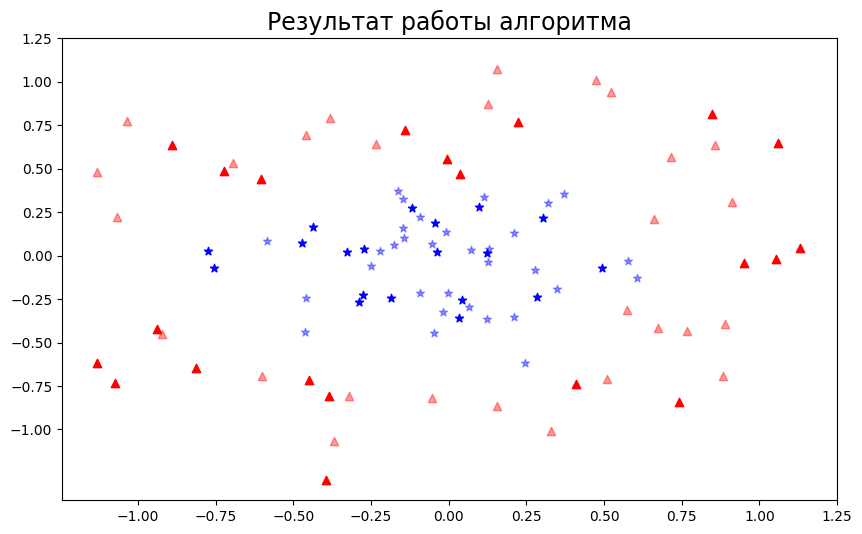

In [781]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-1, 1.5, 0.25))
ax.set_yticks(np.arange(-1, 1.5, 0.25))

plt.show()

## Набор данных 4

In [782]:
X, y = make_blobs(n_samples=100, centers=[[4, 4], [-4, -4]], cluster_std=2, random_state=0)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X= np.dot(X, transformation)

### Разделим данные на обучающую и тестовую выборку
Параметры train_test_split:
- test_size -> указывает какой % данных пойдет на тестовую выборку;
- random_state -> отвечает за перемешивание данных (параметр = 0 гарантирует воспроизводимость результата).

In [783]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

#### Изобразим данные на графике.

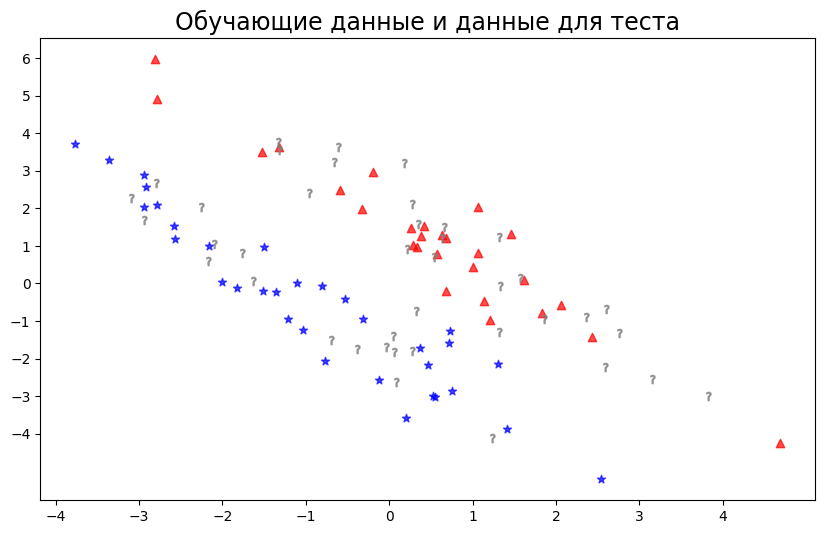

In [784]:
fig, ax = plt.subplots(figsize = (10,6))

# Обучающая выборка - красные треугольники и синие звездочки

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.7)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.7)

# Тестовая выборка - знаки вопроса

ax.scatter(x_test[y_test==0,0],x_test[y_test==0,1], color="grey", marker="$?$", alpha=0.7)
ax.scatter(x_test[y_test==1,0],x_test[y_test==1,1], color="grey", marker="$?$", alpha=0.7)

ax.set_title("Обучающие данные и данные для теста", fontsize=17)

ax.set_xticks(np.arange(-4, 5, 1))
ax.set_yticks(np.arange(-4, 7, 1))

plt.show()

### Реализуем метод Дерево решений для набора данных №4

#### Реализуем метод без гиперпараметров

In [785]:
model_tree = DecisionTreeClassifier()
model_tree.fit(x_train, y_train)
y_pred = model_tree.predict(x_test)

print("Глубина дерева решений =", model_tree.get_depth())
print("Кол-во листьев дерева решений =", model_tree.get_n_leaves(), "\n")

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model_tree.score) =", model_tree.score(x_test, y_test))

Глубина дерева решений = 5
Кол-во листьев дерева решений = 10 

Точность работы модели (accuracy_score) = 0.9
Точность работы модели (model_tree.score) = 0.9


Теперь постараемся улучшить качество работы модели с помощью кросс-валидации и гиперпараметров. В качестве гиперпараметров будут выступать `criterion` и `max_depth`.

> **criterion**: {“gini”, “entropy”, “log_loss”}, default=”gini”<br>
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” both for the Shannon information gain, see Mathematical formulation.<br>
<u>(Метод поиска оптимального признака для ветвления)</u>

> **max_depth**: int, default=None<br>
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

#### Поиск наилучших гиперпараметров для метода

In [794]:
value_accuracy_score_array = [[],[],[]] 
#value_accuracy_score_array[0] - criterion="gini"
#value_accuracy_score_array[1] - criterion="entropy"
#value_accuracy_score_array[2] - criterion="log_loss"

#value_accuracy_score_array[0][0] - criterion="gini", max_depth = 1
#value_accuracy_score_array[0][1] - criterion="gini", max_depth = 2
#...
#value_accuracy_score_array[1][0] - criterion="entropy", max_depth = 1
#value_accuracy_score_array[1][1] - criterion="entropy", max_depth = 2
#...
#value_accuracy_score_array[2][0] - criterion="log_loss", max_depth = 1
#value_accuracy_score_array[2][1] - criterion="log_loss", max_depth = 2
#...

criterion_function = ["gini", "entropy", "log_loss"]
count_max_depth = list(range(1,11))

#Индексы используются для записи в value_accuracy_score_array
index_criterion_function = 0
index_count_max_depth = 0

for crit_func in criterion_function:
    index_count_max_depth = 0
    for count_tree_depth in count_max_depth:
        model_tree = DecisionTreeClassifier(criterion=crit_func, max_depth=count_tree_depth)
        cv_result=cross_validate(model_tree, x_train, y_train, cv=3)#Кросс_валидация
        sum_score_cross_validate = 0
        for i in range(3):
            sum_score_cross_validate+=cv_result['test_score'][i]
        value_accuracy_score_array[index_criterion_function].append(sum_score_cross_validate/3)#avg score cross_validate
        index_count_max_depth+=1
    index_criterion_function+=1
        
print("gini - avg score cross_validate for different max_depth", value_accuracy_score_array[0],"\n")
print("entropy - avg score cross_validate for different max_depth", value_accuracy_score_array[1],"\n")
print("log_loss - avg score cross_validate for different max_depth", value_accuracy_score_array[2])

gini - avg score cross_validate for different max_depth [0.5666666666666668, 0.8666666666666667, 0.8666666666666667, 0.8166666666666668, 0.9, 0.8166666666666668, 0.9, 0.9, 0.8166666666666668, 0.8166666666666668] 

entropy - avg score cross_validate for different max_depth [0.5666666666666668, 0.8333333333333334, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9] 

log_loss - avg score cross_validate for different max_depth [0.5666666666666668, 0.8333333333333334, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9]


Изобразим полученный результат точности работы модели на графике, чтобы определить с каким значением параметров `criterion` и `max_depth` модель дает лучший результат.

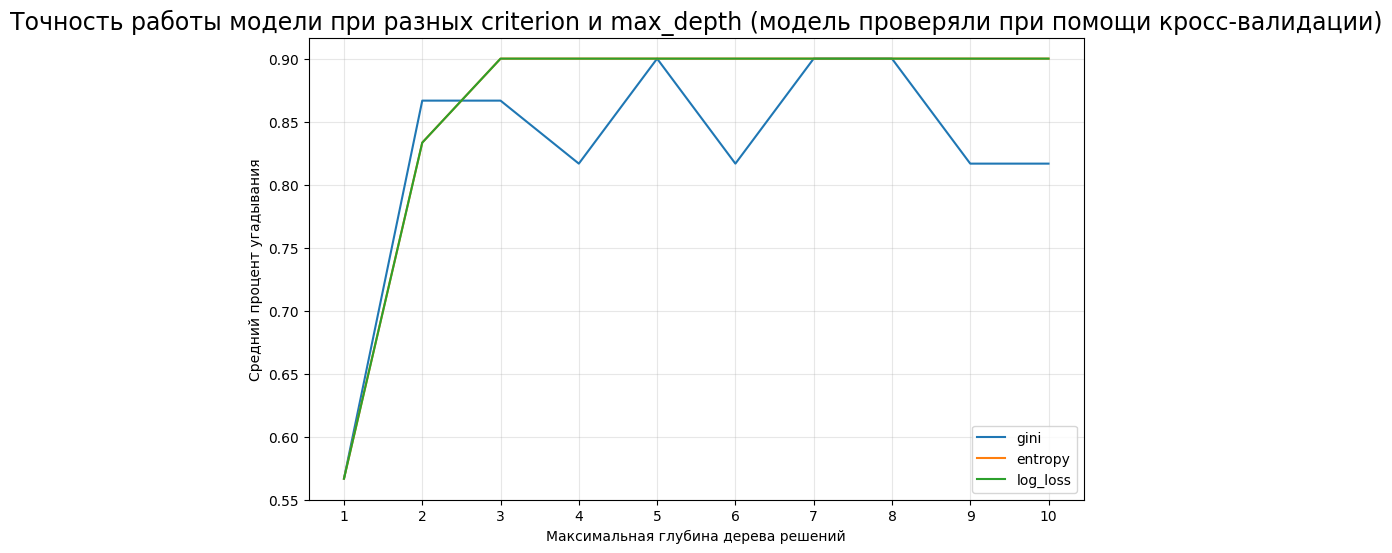

In [795]:
fig, ax = plt.subplots(figsize = (10,6))

ax.plot(count_max_depth, value_accuracy_score_array[0], label=criterion_function[0])
ax.plot(count_max_depth, value_accuracy_score_array[1], label=criterion_function[1])
ax.plot(count_max_depth, value_accuracy_score_array[2], label=criterion_function[2])

ax.set_title("Точность работы модели при разных criterion и max_depth \
(модель проверяли при помощи кросс-валидации)", fontsize=17)

ax.set_xlabel("Максимальная глубина дерева решений") # Подписываем ось X
ax.set_ylabel("Средний процент угадывания") # Подписываем ось Y

ax.set_xticks(count_max_depth)

ax.legend(loc='best') # Расположение легенды (выбирается лучшее расположение автоматически)

ax.grid(alpha = 0.3)

plt.show()

**На самом деле для такого не глубокого дерева, сложно сделать какой-то вывод по гиперпараметрам, так как они дают +- одинаковый результат, отличающийся только в пределах небольшой погрешности.**<br>
criterion="gini", criterion="entropy", criterion="log_loss" -> выдадут одинаковый результат.<br>
max_depth нет смысла выставлять больше 5, потому что не получится собрать дерево глубже этого значения.

#### Реализуем метод с наилучшими гиперпараметрами

In [796]:
model_tree = DecisionTreeClassifier(criterion="log_loss", max_depth=3)
model_tree.fit(x_train, y_train)
y_pred = model_tree.predict(x_test)

print("Глубина дерева решений =", model_tree.get_depth())
print("Кол-во листьев дерева решений =", model_tree.get_n_leaves(), "\n")

print("Точность работы модели (accuracy_score) =", accuracy_score(y_test, y_pred)) 
print("Точность работы модели (model_tree.score) =", model_tree.score(x_test, y_test))

Глубина дерева решений = 3
Кол-во листьев дерева решений = 7 

Точность работы модели (accuracy_score) = 0.925
Точность работы модели (model_tree.score) = 0.925


#### Изобразим результат работы алгоритма на графике

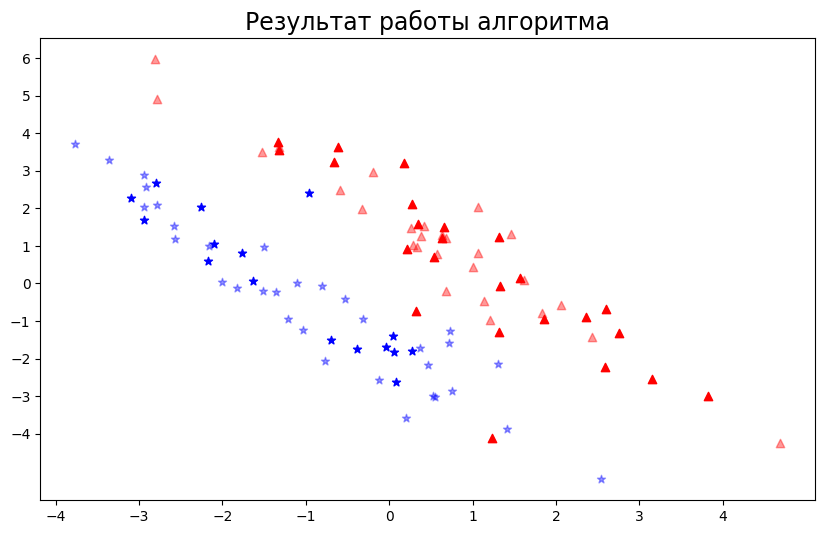

In [797]:
fig, ax = plt.subplots(figsize = (10,6))

# Thus x_train[y_train==0,0] finds all the rows of x_train that
# have a y_train value of 0 (y_train == 0), and are in the first column of x_train...

# Обучающая выборка - красные треугольники и синие звездочки (прозрачные)

ax.scatter(x_train[y_train==0,0],x_train[y_train==0,1], color="r", marker="^", alpha=0.4)
ax.scatter(x_train[y_train==1,0],x_train[y_train==1,1], color="b", marker="*", alpha=0.4)

# Результат работы алгоритма - красные треугольники и синие звездочки (не прозрачные)

ax.scatter(x_test[y_pred==0,0],x_test[y_pred==0,1], color="r", marker="^", alpha=1)
ax.scatter(x_test[y_pred==1,0],x_test[y_pred==1,1], color="b", marker="*", alpha=1)

ax.set_title("Результат работы алгоритма", fontsize=17)

ax.set_xticks(np.arange(-4, 5, 1))
ax.set_yticks(np.arange(-4, 7, 1))

plt.show()